In [110]:
import sys
import os
sys.path.append(sys.path[0]+'/../../')
from functions import *
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Here, I bring in fits generated in the "LoadNMR" notebook

In [111]:
hunterFits=np.load(sys.path[0]+'/../../NMRDataFits/HunterKin3.npy')

nmrDateStrings=hunterFits[0].astype(int).astype(str)

nmrDates=np.empty(0)
for i in nmrDateStrings:
    nmrDates=np.append(nmrDates,datetime.strptime(i,"%Y%m%d%H%M%S"))

pcFits=hunterFits[1]
usFits=hunterFits[2]
dsFits=hunterFits[3]

# Here, I bring in EPR calibrations generated in the "LoadEPR" notebook

In [112]:
EPR=np.transpose(np.load(sys.path[0]+'/../../EPRArray/EPRCalibrationsV2.npy',allow_pickle=True))
EPRdates=EPR[0][38:]
EPRpc=EPR[1][38:]
EPRds=EPR[3][38:]

eprDateStrings=EPR[0].astype(str)

eprDates=np.empty(0)
for i in eprDateStrings:
    eprDates=np.append(eprDates,datetime.strptime("2022"+i,"%Y%m%d%H%M"))

pcCals=EPR[1]
usCals=EPR[2]
dsCals=EPR[3]

# Organizing NMRs 

In [113]:
len(EPRpc)

11

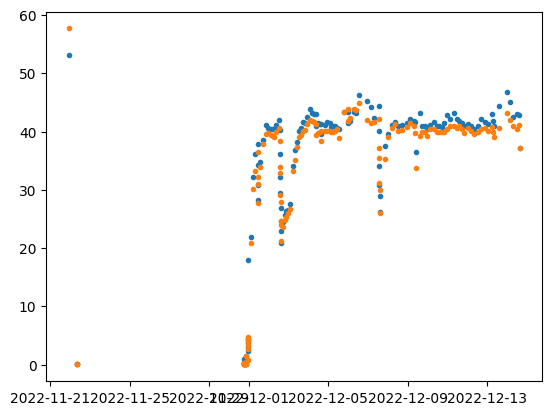

In [114]:
Hdate2=hunterFits[0].astype(int).astype(str)

Hdate2_objects=[datetime.strptime(date,"%Y%m%d%H%M%S") for date in Hdate2]
Hdate2_array=np.array(Hdate2_objects)
Hsorted_dates2=np.sort(Hdate2_array)
Hindex_array2=[Hdate2_objects.index(date) for date in Hsorted_dates2]

len(Hsorted_dates2)
H2=hunterFits[3][Hindex_array2]
H2pc=hunterFits[1][Hindex_array2]
checkerH2=np.where(H2<25)
Hsorted_dates2=Hsorted_dates2[checkerH2][15:-1]
H2=H2[checkerH2][15:-1]
H2pc=H2pc[checkerH2][15:-1]


Hsorted_dates2=Hsorted_dates2[np.where(H2!=0)]
H2=H2[np.where(H2!=0)]
H2pc=H2pc[np.where(H2pc!=0)]
plt.plot(Hsorted_dates2,np.mean(EPRds)*H2,'.')
plt.plot(Hsorted_dates2,np.mean(EPRpc)*H2pc,'.')
#plt.plot(Hsorted_dates2,H2pc)
sweepRatios=H2pc/H2


# Here I bring in EPR NMR before and after sweeps

In [115]:
myFits=np.transpose(hunterFits)
dates=myFits[:,0].astype(int).astype(str)
date_objects = [datetime.strptime(date, "%Y%m%d%H%M%S") for date in dates]
dates_array = np.array(date_objects)
sorted_dates = np.sort(dates_array)
index_array = [date_objects.index(date) for date in sorted_dates]
HunterKin2FitsOrdered = np.transpose(np.take(myFits, index_array, axis=0))


dateList=np.empty(0)
RatioB=np.empty(0)
RatioA=np.empty(0)

for i in range(0,len(HunterKin2FitsOrdered[0])):
    dateList=np.append(dateList,str(int(HunterKin2FitsOrdered[0][i]))[:8]+'_'+str(int(HunterKin2FitsOrdered[0][i]))[8:])
for i in range(0,len(EPRdates)):
    b,a=FindNMRsB4andAft('2022'+str(EPRdates[i]),dateList)
    #print(i)
    RatioB=np.append(RatioB,HunterKin2FitsOrdered[1][b]/HunterKin2FitsOrdered[3][b])
    #print(HunterKin2FitsOrdered[1][b]/HunterKin2FitsOrdered[3][b])
    RatioA=np.append(RatioA,HunterKin2FitsOrdered[1][a]/HunterKin2FitsOrdered[3][a])
    #print(HunterKin2FitsOrdered[1][a]/HunterKin2FitsOrdered[3][a])

# EPR Density Corrections

In [116]:
RatioB

array([0.34264744, 0.29128116, 0.30366799, 0.28793919, 0.30726527,
       0.31362014, 0.3160487 , 0.28700852, 0.31293066, 0.31275015,
       0.30193398])

In [117]:
RatioA

array([0.33462863, 0.28419423, 0.29670155, 0.28412041, 0.29877226,
       0.30279563, 0.30535401, 0.28035918, 0.30447885, 0.30111615,
       0.29694047])

This better be 1.0 -->  1.0
1.7372515870119793   6.1794178663903


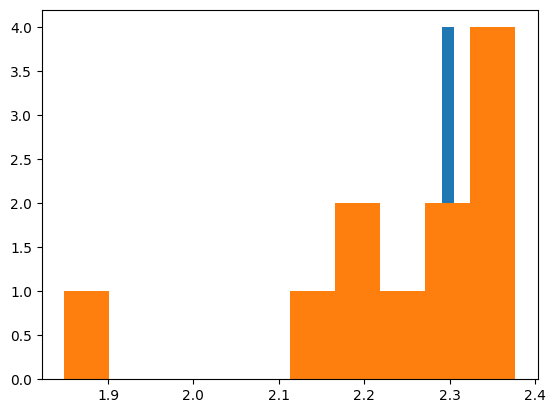

In [118]:
C2=306.1659 #V_PC
C3=44.8700 #V_TT
C4=160.9000 #V_TC
C6=878.7170 #kHz/Gauss
C7=4.8376 #cbar/(kHz/G)
F2=7.38658534932298 #Fill Density
F3=265 #ref. T_pc
F4=31.5 #ref. T_tc
F5=.30366799 #ref_ratio

I2=C2*(F4+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_pc
I3=(C4+C3)*(F3+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_tc
print('This better be 1.0 --> ',I2+I3)

#T_pc
N=np.empty(0)
O=np.empty(0)
for i in range(0,len(RatioB)):
    N=np.append(N,(F5/RatioB[i])*F3)
    O=np.append(O,F4)

#alpha
R=np.empty(0)
for i in range(0,len(RatioB)):
    R=np.append(R,1/((F5/RatioB[i])*(1-I2)+I2))

#beta
S=np.empty(0)
for i in range(0,len(RatioB)):
    S=np.append(S,(F5/RatioB[i])/((F5/RatioB[i])*I3+1-I3))

#f_pc
T=np.empty(0)
for i in range(0,len(RatioB)):
    T=np.append(T,R[i]*I2)

#f_tc
U=np.empty(0)
for i in range(0,len(RatioB)):
    U=np.append(U,S[i]*I3)
    
    
    



adjDS=EPRds*S
EPRdates=EPRdates[np.where(adjDS!=0)]
EPRds=EPRds[np.where(adjDS!=0)]
adjDS=adjDS[np.where(adjDS!=0)]
adjPC=EPRpc*R
adjPC=adjPC[np.where(adjPC!=0)]
dsBaseLine=EPRds[np.where(EPRds!=0)]


EPRdates=EPRdates[np.where(adjDS>2)]
EPRds=EPRds[np.where(adjDS>2)]
adjDS=adjDS[np.where(adjDS>2)]
FinalEPRds=np.mean(adjDS)
FinalEPRdsE=np.std(adjDS)

dsNewHist=plt.hist(adjDS)
dsHist=plt.hist(dsBaseLine)
print(100*np.std(adjDS)/np.mean(adjDS),' ',100*np.std(dsBaseLine)/np.mean(adjDS))

In [119]:
## add on to use alpha and beta to correct NMRs


C2=306.1659 #V_PC
C3=44.8700 #V_TT
C4=160.9000 #V_TC
C6=878.7170 #kHz/Gauss
C7=4.8376 #cbar/(kHz/G)
F2=7.38658534932298 #Fill Density
F3=265 #ref. T_pc
F4=31.5 #ref. T_tc
F5=.30366799 #ref_ratio

I2=C2*(F4+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_pc
I3=(C4+C3)*(F3+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_tc
print('This better be 1.0 --> ',I2+I3)

#T_pc
N=np.empty(0)
O=np.empty(0)
for i in range(0,len(sweepRatios)):
    N=np.append(N,(F5/sweepRatios[i])*F3)
    O=np.append(O,F4)

#alpha
R=np.empty(0)
for i in range(0,len(sweepRatios)):
    R=np.append(R,1/((F5/sweepRatios[i])*(1-I2)+I2))

#beta
S=np.empty(0)
for i in range(0,len(sweepRatios)):
    S=np.append(S,(F5/sweepRatios[i])/((F5/sweepRatios[i])*I3+1-I3))

#f_pc
T=np.empty(0)
for i in range(0,len(sweepRatios)):
    T=np.append(T,R[i]*I2)

#f_tc
U=np.empty(0)
for i in range(0,len(sweepRatios)):
    U=np.append(U,S[i]*I3)
    
newEPRs=FinalEPRds/S


This better be 1.0 -->  1.0


In [120]:
len(EPRdates)

10

In [121]:
len(adjDS)

10

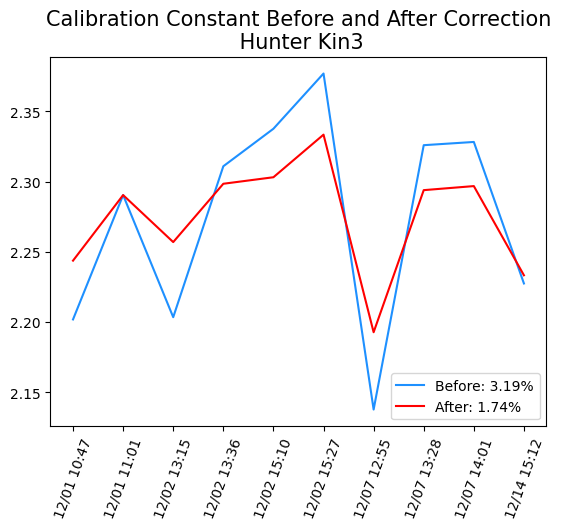

In [122]:
EPRdatetime=np.empty(0)
dateString=np.empty(0)

oldPerc=str(np.round(np.std(EPRds)/np.mean(EPRds)*100,2))
newPerc=str(np.round(np.std(adjDS)/np.mean(adjDS)*100,2))

for i in range(0,len(EPRdates)):
    EPRdatetime=np.append(EPRdatetime,datetime.strptime('2022'+str(EPRdates[i]),'%Y%m%d%H%M'))
    dateString=np.append(dateString,str(EPRdates[i])[:2]+'/'+str(EPRdates[i])[2:4]+' '+str(EPRdates[i])[4:6]+':'+str(EPRdates[i])[6:])

plt.plot(dateString,EPRds,label='Before: '+oldPerc+'%',color='dodgerblue')
plt.plot(dateString,adjDS,label='After: '+newPerc+'%',color='red')
plt.legend(loc='lower right')
x=plt.xticks(rotation=70)



#np.std(adjDS)/np.mean(adjDS)*100
plt.title("Calibration Constant Before and After Correction"+'\n Hunter Kin3',fontsize=15)
plt.savefig('CalCorrectionHunterKin3.png')

In [123]:
len(adjDS)

10

In [124]:
oldPerc=np.round(np.std(EPRds)/np.mean(EPRds)*100,3)
newPerc=np.round(np.std(adjDS)/np.mean(adjDS)*100,3)

In [125]:
FinalEPRds=np.mean(adjDS)

# Take the Density Corrected EPR Calibration and apply it to all NMRs

In [126]:
CorrectedRatio=F5

newEPRds=np.empty(0)
CorrectedNMRs=np.empty(0)
for i,j in enumerate(H2):
    #CorrectedNMRs=np.append(CorrectedNMRs,j*FinalEPRds*sweepRatios[i]/CorrectedRatio)
    CorrectedNMRs=np.append(CorrectedNMRs,j*newEPRs[i])
    newEPRds=np.append(newEPRds,FinalEPRds*CorrectedRatio/sweepRatios[i])

Text(0, 0.5, 'Counts')

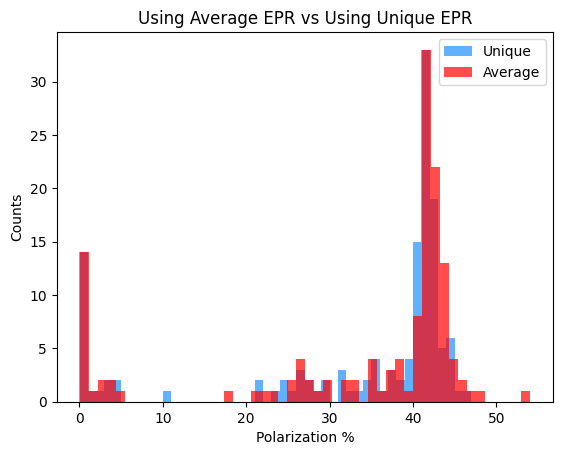

In [127]:
d=plt.hist(CorrectedNMRs,bins=50,alpha=.7,color='dodgerblue',label="Unique",range=(0,50))
k=plt.hist(H2*FinalEPRds,bins=50,alpha=.7,color='red',label="Average")
plt.title("Using Average EPR vs Using Unique EPR")
plt.legend(loc='upper right')
plt.xlabel("Polarization %")
plt.ylabel("Counts")

### Create error arrays and variables for FinalEPRds, SweepRatios

In [128]:
Hsorted_dates2

array([datetime.datetime(2022, 11, 21, 22, 31, 45),
       datetime.datetime(2022, 11, 22, 8, 33, 23),
       datetime.datetime(2022, 11, 22, 8, 55, 37),
       datetime.datetime(2022, 11, 30, 18, 25, 47),
       datetime.datetime(2022, 11, 30, 18, 27, 27),
       datetime.datetime(2022, 11, 30, 18, 27, 56),
       datetime.datetime(2022, 11, 30, 18, 30, 52),
       datetime.datetime(2022, 11, 30, 18, 44, 21),
       datetime.datetime(2022, 11, 30, 18, 46, 8),
       datetime.datetime(2022, 11, 30, 20, 1, 56),
       datetime.datetime(2022, 11, 30, 20, 2, 31),
       datetime.datetime(2022, 11, 30, 20, 34, 17),
       datetime.datetime(2022, 11, 30, 21, 2, 21),
       datetime.datetime(2022, 11, 30, 21, 2, 56),
       datetime.datetime(2022, 11, 30, 21, 3, 41),
       datetime.datetime(2022, 11, 30, 21, 4, 13),
       datetime.datetime(2022, 11, 30, 22, 41, 10),
       datetime.datetime(2022, 11, 30, 22, 43, 41),
       datetime.datetime(2022, 11, 30, 22, 59, 24),
       datetime.datet

In [129]:
np.save("uncorrected.npy",H2[np.where(CorrectedNMRs<100)])
np.savetxt("FinalEPRdsE.txt",[[FinalEPRdsE]])
np.savetxt("FinalEPRds.txt",[FinalEPRds])
np.savetxt("ReferenceRatio.txt",[[CorrectedRatio]])
np.save("newEPRds.npy",newEPRds[np.where(CorrectedNMRs<100)])
np.save("sweepRatios.npy",sweepRatios[np.where(CorrectedNMRs<100)])

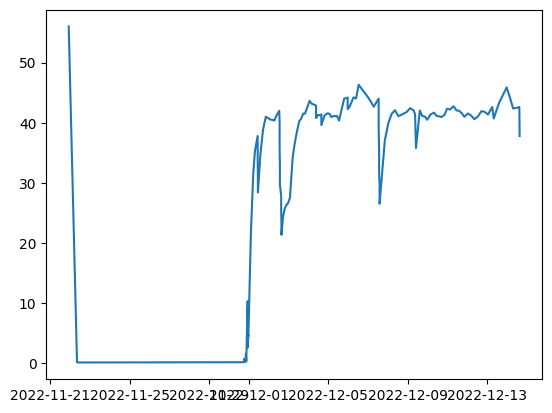

In [130]:
Hsorted_dates2=Hsorted_dates2[np.where(CorrectedNMRs<100)]
CorrectedNMRs=CorrectedNMRs[np.where(CorrectedNMRs<100)]

plt.plot(Hsorted_dates2,CorrectedNMRs)


In [131]:
np.save(sys.path[0]+'/../H3SortedDatesCorrected.npy',Hsorted_dates2)
np.save(sys.path[0]+'/../H3CorrectedDSNMR.npy',CorrectedNMRs)

In [132]:
len(RatioB)

11

In [133]:
EPRdates

array([12011047, 12011101, 12021315, 12021336, 12021510, 12021527,
       12071255, 12071328, 12071401, 12141512], dtype=object)